# Спрос на рейсы авиакомпании

## Описание проекта

Вы аналитик российской авиакомпании F9, которая выполняет внутренние пассажирские перевозки. Для развития компании важно понять предпочтения пользователей, покупающих билеты на разные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
Инструкция по выполнению проекта
Проведите исследовательский анализ данных средствами SQL.
Соберите данные для анализа из базы.
Проанализируйте данные средствами Python.

## Описание данных

База данных об авиаперевозках состоит из нескольких таблиц.

Таблица airports — информация об аэропортах:

    airport_code — трёхбуквенный код аэропорта,
    airport_name — название аэропорта,
    city — город,
    timezone — временная зона.
    
Таблица aircrafts — информация о самолётах:

    aircraft_code — код модели самолёта,
    model — модель самолёта,
    range — дальность полёта.

Таблица tickets — информация о билетах:

    ticket_no — уникальный номер билета,
    passenger_id — персональный идентификатор пассажира,
    passenger_name — имя и фамилия пассажира.

Таблица flights — информация о рейсах:

    flight_id — уникальный идентификатор рейса,
    departure_airport — аэропорт вылета,
    departure_time — дата и время вылета,
    arrival_airport — аэропорт прилёта,
    arrival_time — дата и время прилёта,
    aircraft_code — id самолёта.

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

    ticket_no — номер билета,
    flight_id — идентификатор рейса.

Таблица festivals — информация о фестивалях

    festival_id — уникальный номер фестиваля,
    festival_date — дата проведения фестиваля,
    festival_city — город проведения фестиваля,
    festival_name — название фестиваля.


## Схема таблиц
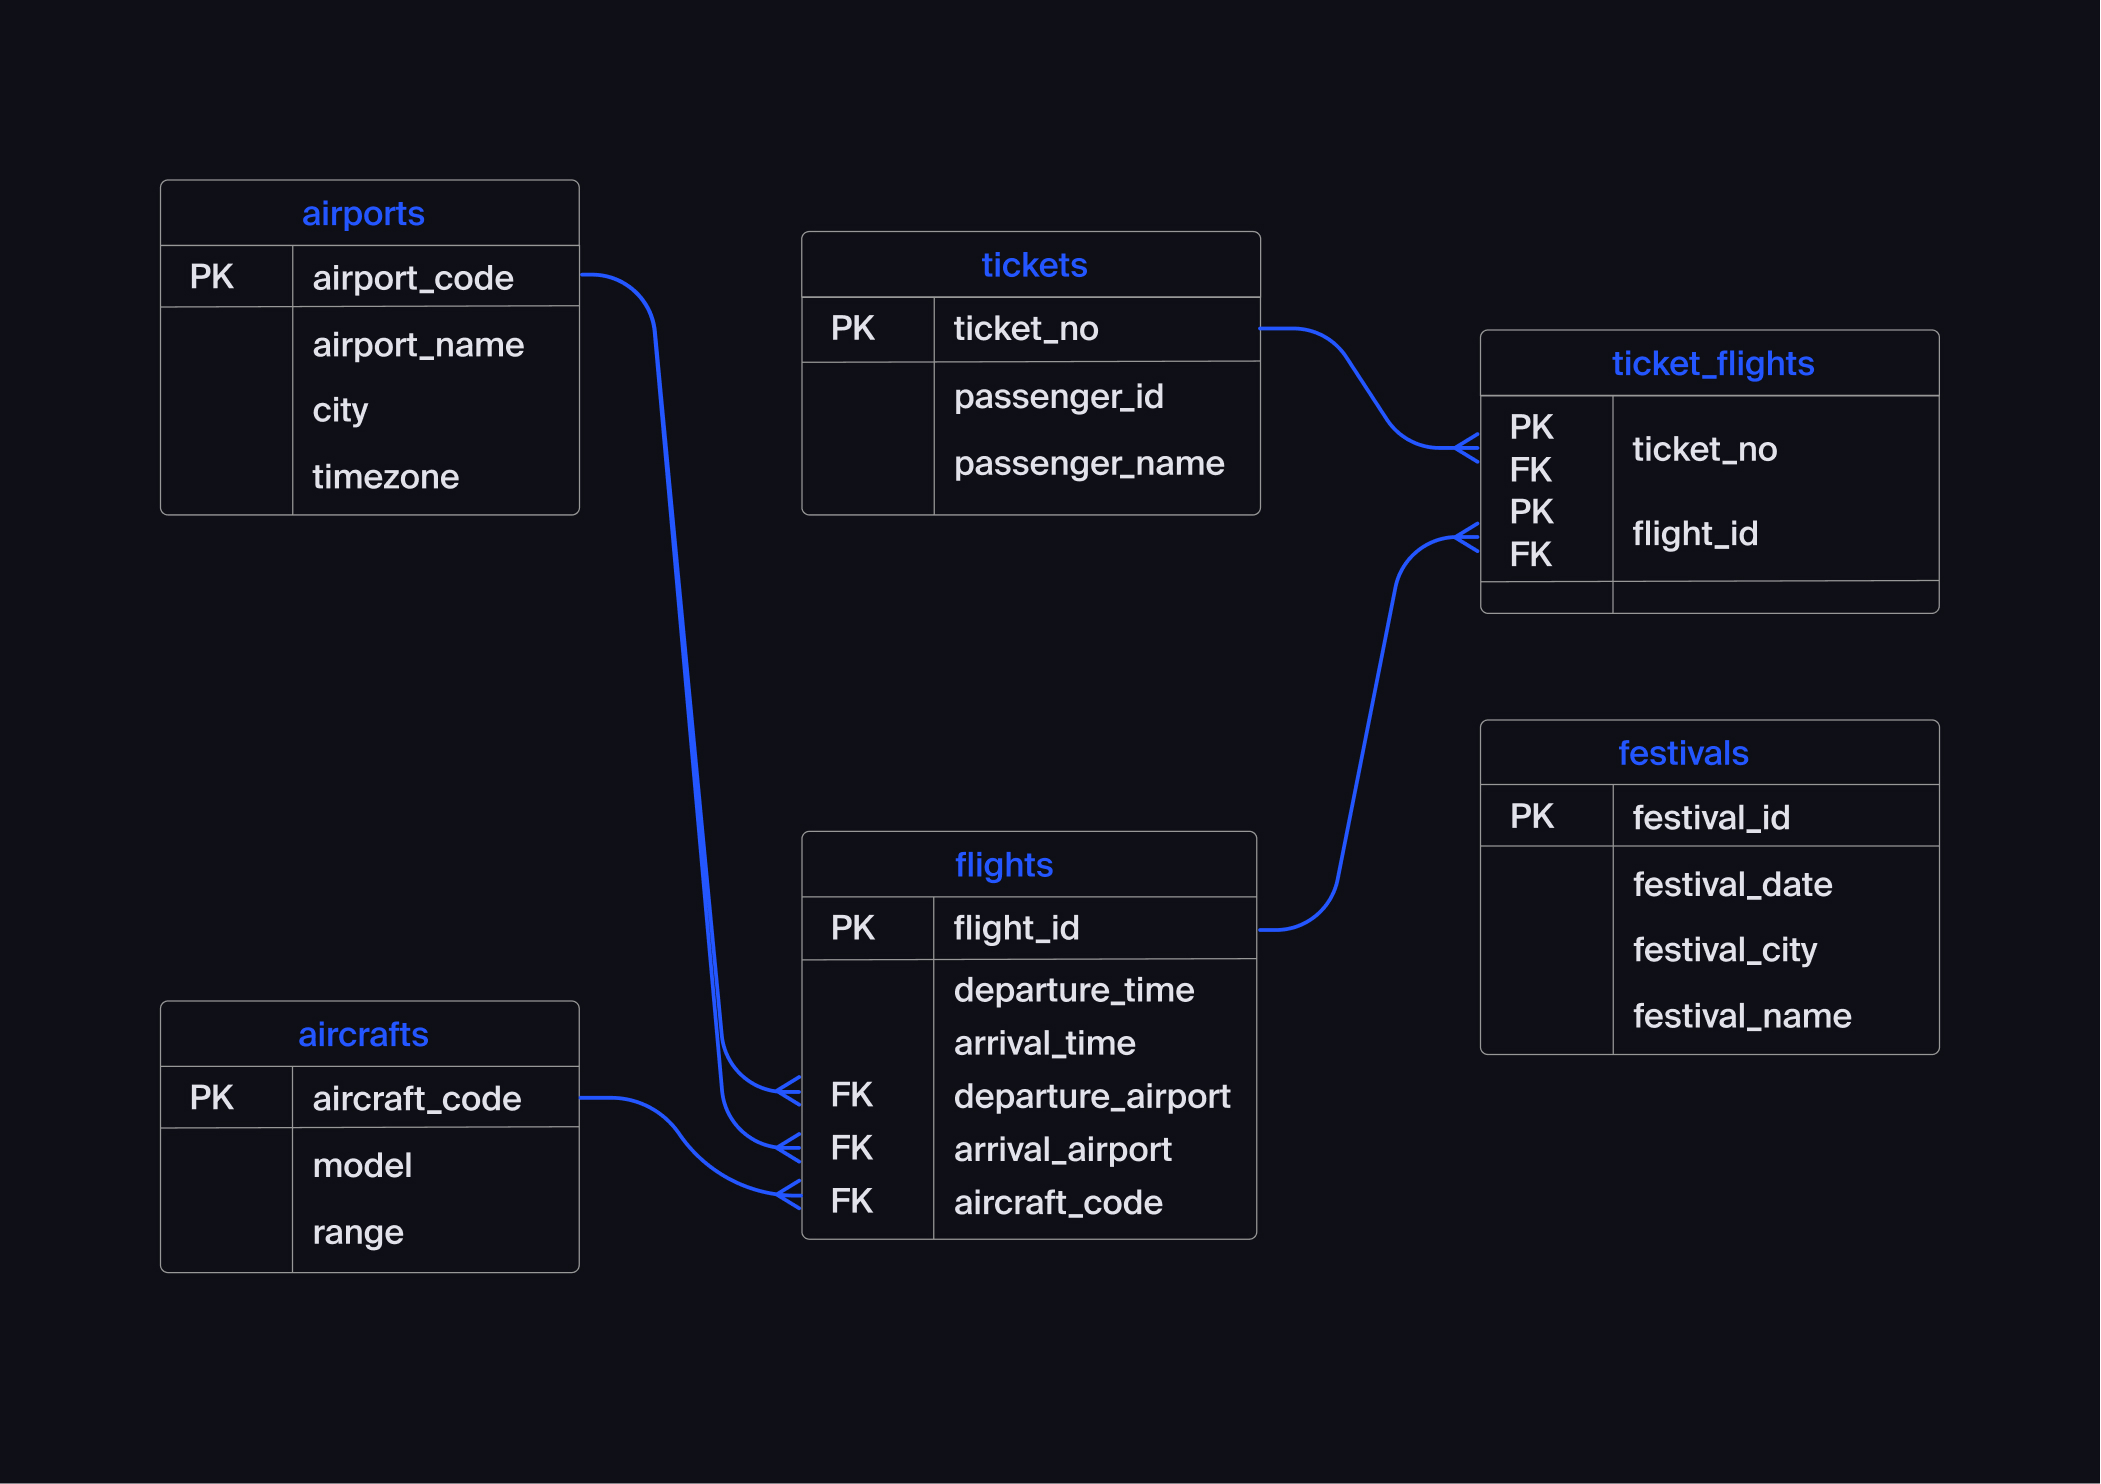

### Задание
Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его. Также напечатайте на экране поле model. Столбцы в таблице должны быть выведены в следующем порядке:

    model
    flights_amount

Так как все задания выполнялись на сервере yandex и скопировать содержание таблиц затруднительно, то я приведу код решения в markdown ячейках и дополню скриншотом реализации запроса.

    SELECT
        aircrafts.model AS model,
        COUNT(flights.flight_id) AS flights_amount
    FROM
        aircrafts
        INNER JOIN flights ON flights.aircraft_code  = aircrafts.aircraft_code
    WHERE
        CAST(flights.departure_time AS date) BETWEEN '2018-09-01' 
        AND '2018-09-30'
    GROUP BY
        model;

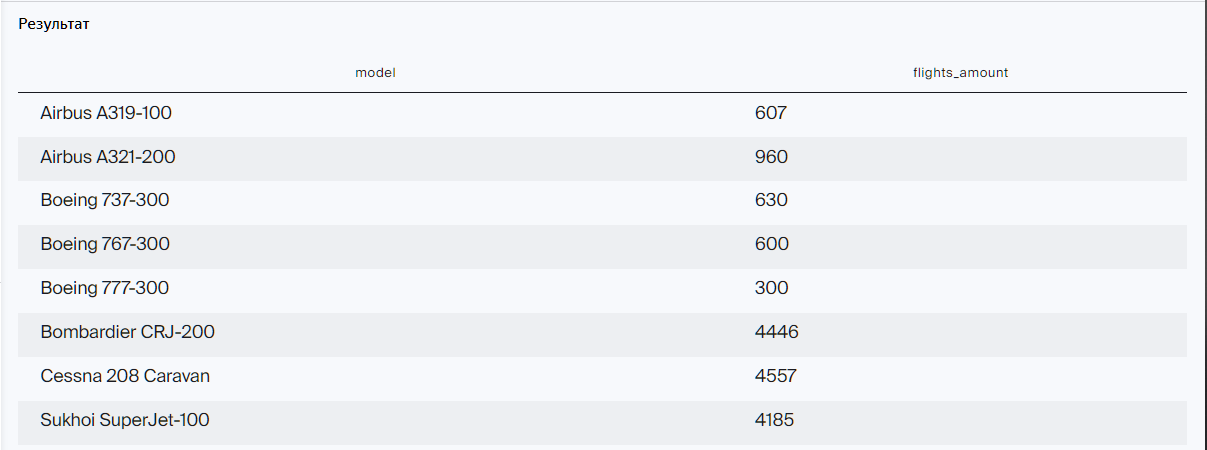

### Задание
Посчитайте отправленные в сентябре рейсы самолётов следующих моделей:
Boeing,
Airbus,
другие (“other”).
Назовите получившуюся переменную flights_amount и выведите её значение на экран.

    SELECT
        CASE
            WHEN aircrafts.model LIKE '%Boeing%' THEN 'Boeing'
            WHEN aircrafts.model LIKE '%Airbus%' THEN 'Airbus'
            ELSE 'other'
            END,
        COUNT(flights.*) as flights_amount
    FROM
        aircrafts
        INNER JOIN flights ON flights.aircraft_code  = aircrafts.aircraft_code
    WHERE
        CAST(flights.departure_time AS date) BETWEEN '2018-09-01' 
        AND '2018-09-30'
    GROUP BY
        CASE
            WHEN aircrafts.model LIKE '%Boeing%' THEN 'Boeing'
            WHEN aircrafts.model LIKE '%Airbus%' THEN 'Airbus'
            ELSE 'other'
        END;

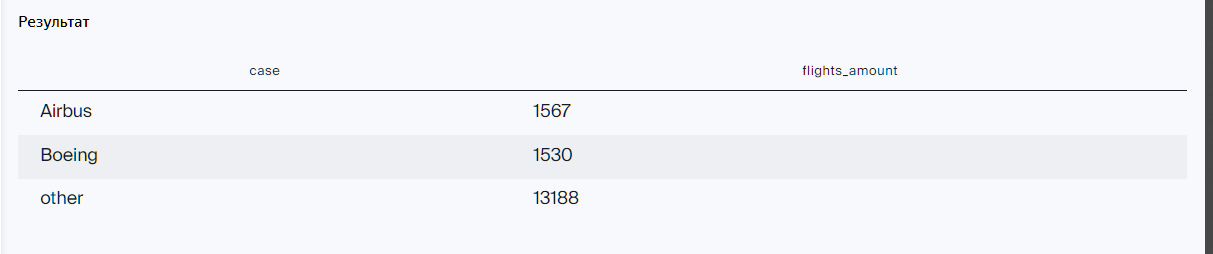

### Задание
Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city.
Выводите столбцы в таком порядке:

    city,
    average_flights.

    WITH count_flights AS 
    (SELECT
         COUNT(flights.flight_id) AS flights_amount,
         EXTRACT(DAY FROM flights.arrival_time) AS day,
         airports.city AS city
     FROM
         flights
         INNER JOIN airports ON airports.airport_code = flights.arrival_airport
     WHERE
         EXTRACT(MONTH FROM flights.arrival_time) = 8
     GROUP BY
         city,
         day
    )
    SELECT
        count_flights.city AS city,
        AVG(count_flights.flights_amount) as average_flights
    FROM
        count_flights
    GROUP BY
        city
    ORDER BY
        city;

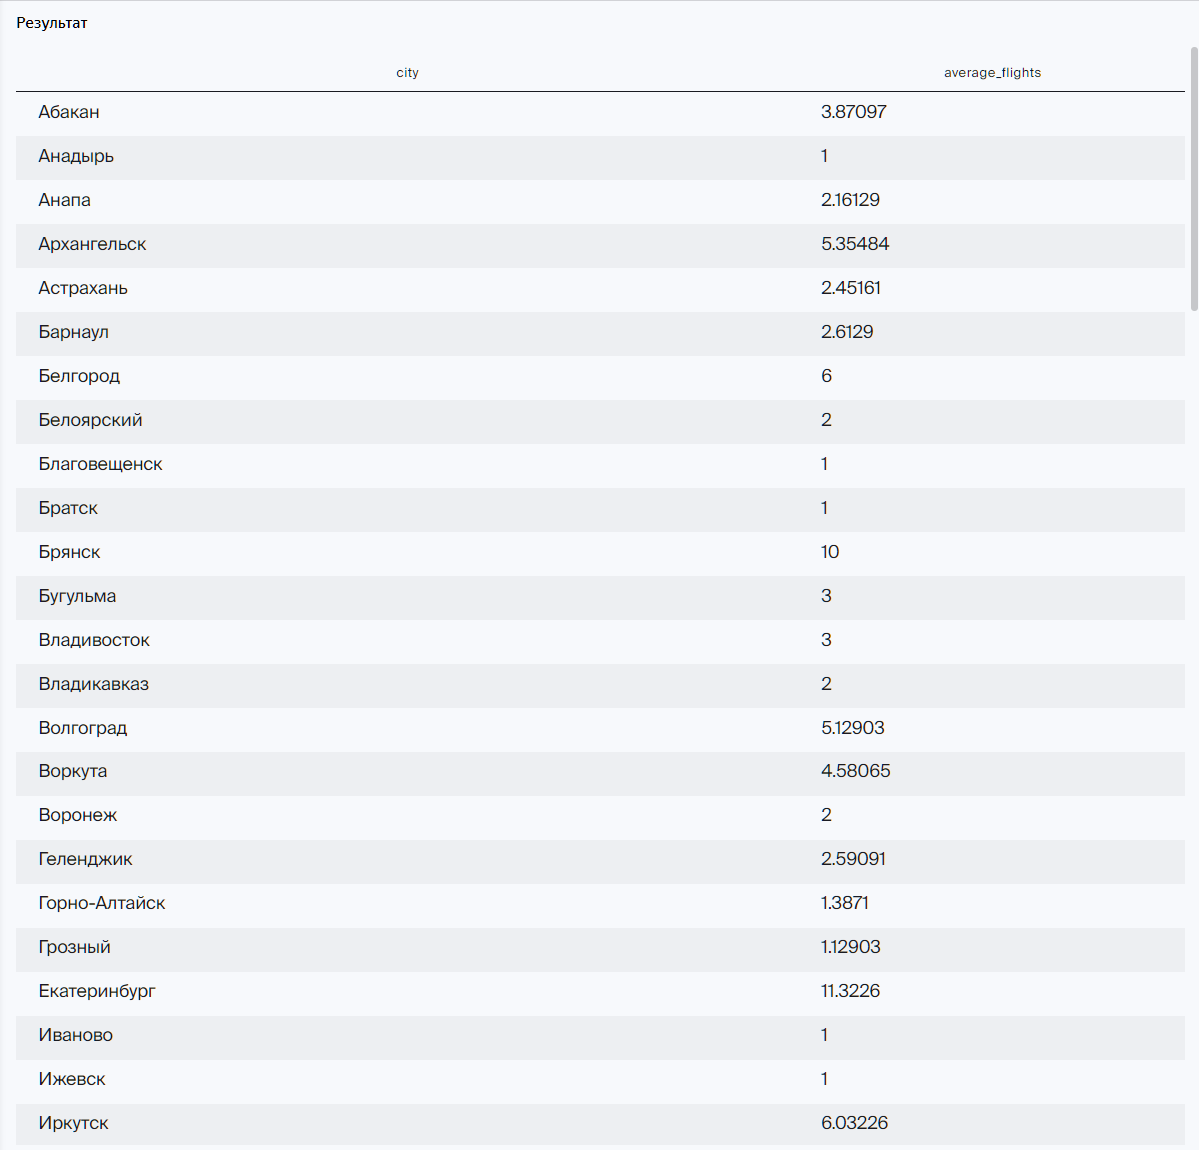

### Задание
Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.

    SELECT
        festivals.festival_name AS festival_name,
        EXTRACT(WEEK FROM festivals.festival_date) AS festival_week
    FROM
        festivals
    WHERE
        CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' 
        AND '2018-09-30' AND festivals.festival_city LIKE 'Москва'
    GROUP BY
        festival_name,
        festival_week;

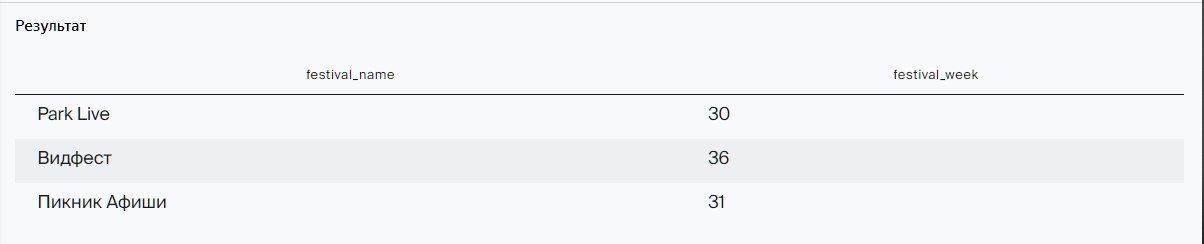

### Задание
Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте билеты, которые купили на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получите таблицу:

    с количеством купленных за неделю билетов;
    отметкой, проходил ли в эту неделю фестиваль;
    название фестиваля festival_name;
    номер недели week_number.

Выводите столбцы в таком порядке: - week_number - ticket_amount - festival_week - festival_name

    SELECT
        EXTRACT(WEEK FROM flights.arrival_time) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount,
        festivals.festival_week,
        festivals.festival_name AS festival_name
    FROM
        ticket_flights
        INNER JOIN flights ON flights.flight_id = ticket_flights.flight_id 
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
        FULL JOIN 
    (SELECT
        festivals.festival_name AS festival_name,
        EXTRACT(WEEK FROM festivals.festival_date) AS festival_week
    FROM
        festivals
    WHERE
        CAST(festivals.festival_date AS date) BETWEEN '2018-07-23' 
        AND '2018-09-30' AND festivals.festival_city LIKE 'Москва'
    ) AS festivals 
    ON festivals.festival_week  = EXTRACT(WEEK FROM flights.arrival_time)
    WHERE
        CAST(flights.arrival_time AS date) BETWEEN '2018-07-23' 
        AND '2018-09-30' 
        AND airports.city = 'Москва'
    GROUP BY
        week_number,
        festival_week,
        festival_name
    ORDER BY
        week_number,
        festival_week,
        festival_name;

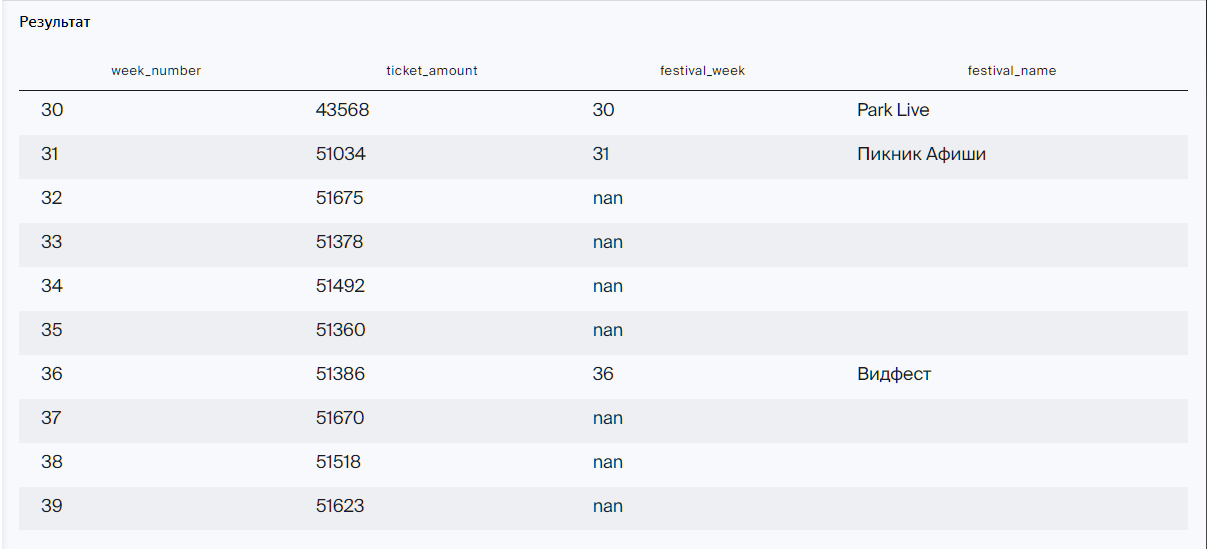